**Трофимов Михаил, ПМ22-1**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Задача 1

Изучите гистограмму какого-либо изображения на предмет как она себя ведет при следующих преобразованиях.
1. При переносах: меняйте расстояния и для каждого случая изучите гистограмму. Различаются ли гистограммы входного и выходного изображения при разных расстояниях переноса?
2. При поворотах: меняйте углы и для каждого случая изучите гистограмму. Различаются ли гистограммы входного и выходного изображения при разных углах?
3. Различаются ли гистограммы входного и выходного изображения для разных преобразований? Объясните увиденное.

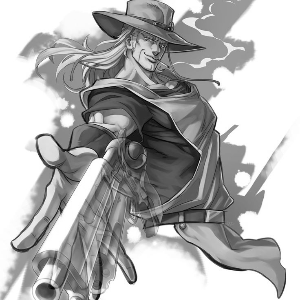

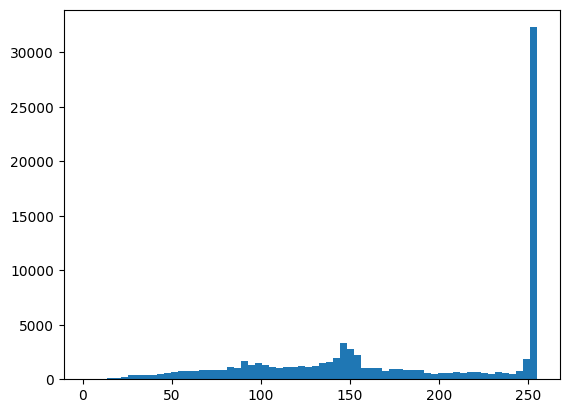

In [2]:
image = cv2.imread('HolHorse.jpg')
image = cv2.resize(image, (300, 300))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
plt.hist(image.flatten(), 64)
plt.show()

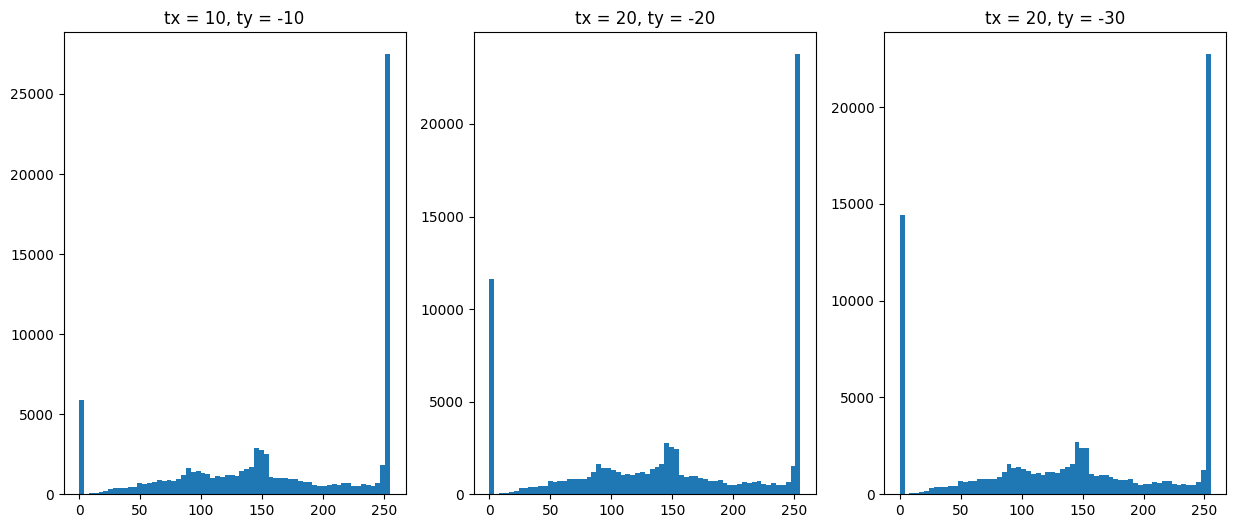

In [3]:
fig, axs = plt.subplots(1, 3, figsize = (15, 6))
axs = axs.ravel()

c = 0
for i, j in [[10, -10], [20, -20], [20, -30]]:
    height, width = image.shape[:2]
    tx, ty = i, j
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty]
    ], dtype=np.float32)
    translated_image = cv2.warpAffine(src=image, M=translation_matrix, dsize=(width, height))
    axs[c].set_title(f'tx = {i}, ty = {j}')
    axs[c].hist(translated_image.flatten(), 64)
    c += 1
plt.show()

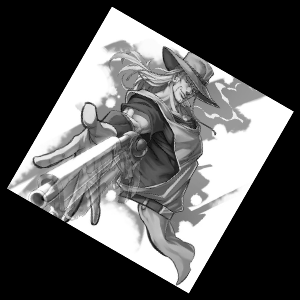

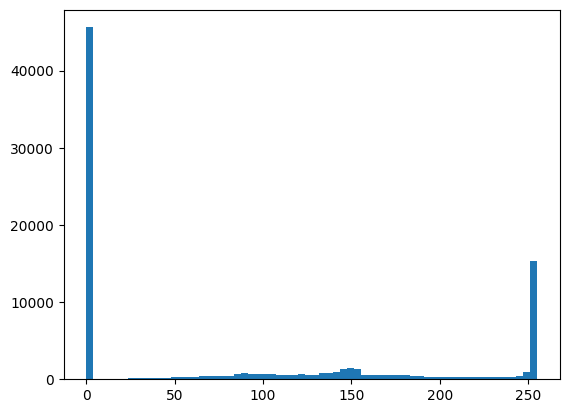

In [4]:
height, width = image.shape[:2]
center = (width // 2, height // 2)
M = cv2.getRotationMatrix2D(center, -30, .7)
rotated = cv2.warpAffine(image, M, (width, height))
cv2_imshow(rotated)
plt.hist(rotated.flatten(), 64)
plt.show()

# Задача 2

Что произойдет, если вы увеличите (масштабируете) изображение, сохраняя при этом размер изображения? Попробуйте разные уровни масштабирования (2X, 3X и 4X). Будут ли гистограммы входного изображения и выходного изображения выглядеть по-разному? Покажите это.

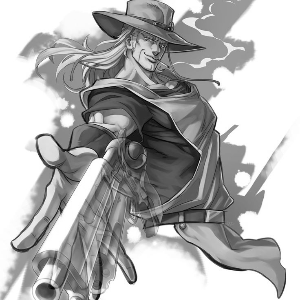

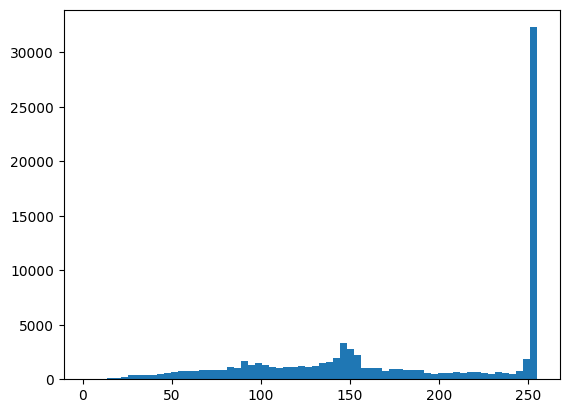

In [5]:
image = cv2.imread('HolHorse.jpg')
image = cv2.resize(image, (300, 300))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
plt.hist(image.flatten(), 64)
plt.show()

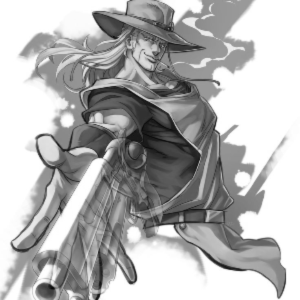

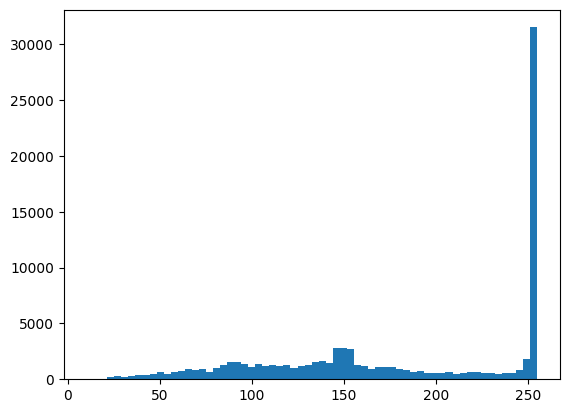

In [6]:
image2 = cv2.resize(cv2.resize(image, None, fx = 2, fy = 2), (300, 300))
cv2_imshow(image2)
plt.hist(image2.flatten(), 64)
plt.show()

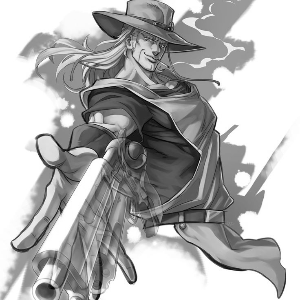

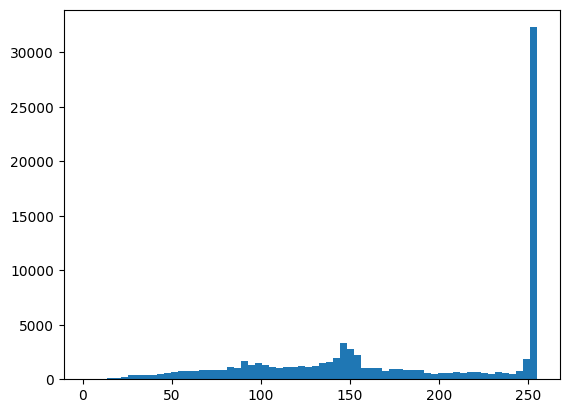

In [7]:
image3 = cv2.resize(cv2.resize(image, None, fx = 3, fy = 3), (300, 300))
cv2_imshow(image3)
plt.hist(image3.flatten(), 64)
plt.show()

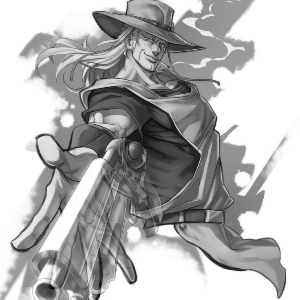

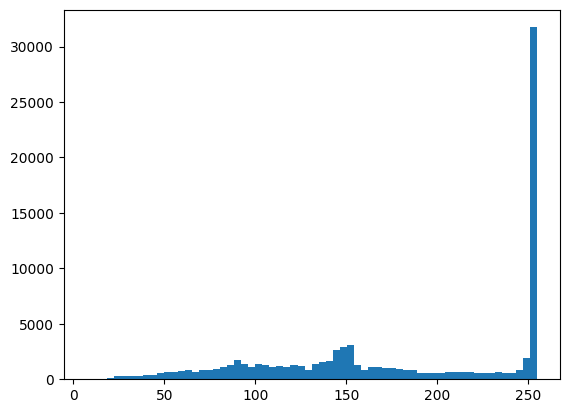

In [8]:
image4 = cv2.resize(cv2.resize(image, None, fx = 4, fy = 4), (300, 300))
cv2_imshow(image4)
plt.hist(image4.flatten(), 64)
plt.show()

# Задача 3

Попробуйте как можно качественнее избавиться от фона изображения [https://drive.google.com/file/d/1MZsKGAhnrIikel7zcSWtxszmxfVP1zSq/view?usp=drive_link](https://drive.google.com/file/d/1MZsKGAhnrIikel7zcSWtxszmxfVP1zSq/view?usp=drive_link)

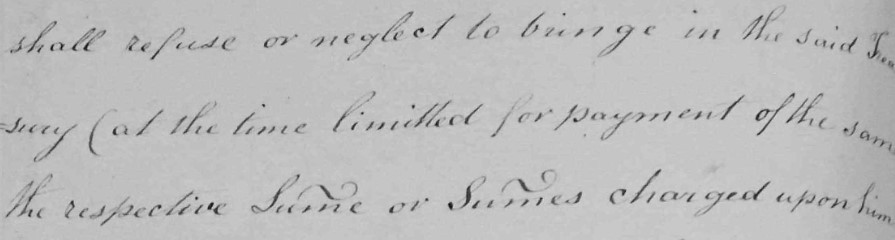

In [9]:
image = cv2.imread('cursive-snippet.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

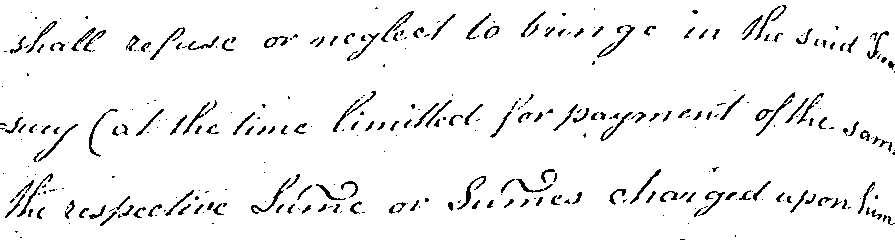

In [10]:
img = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 7)
cv2_imshow(img)

# Задача 4

Исследуйте изображение [https://drive.google.com/file/d/1mPdQQsleX4CN1k5zh85LK2NLeipXzH7L/view?usp=drive_link](https://drive.google.com/file/d/1mPdQQsleX4CN1k5zh85LK2NLeipXzH7L/view?usp=drive_link) и улучшите его разными методами, сравните полученные результаты. Выберите лучше сработавший метод и обоснуйте почему он оказался лучше.

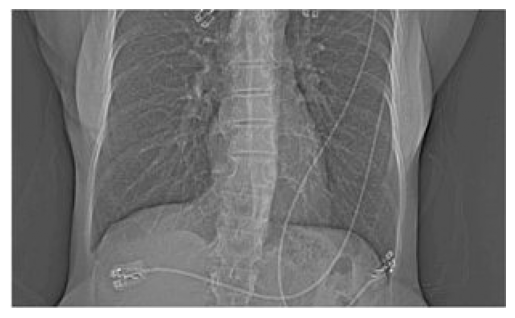

In [11]:
image = cv2.imread('eqlz.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

In [12]:
kernel = np.ones((5, 5), np.uint8)

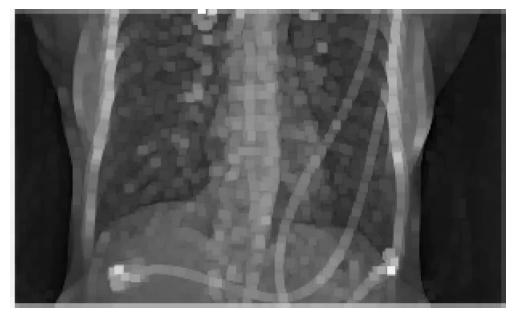

In [13]:
dilation = cv2.dilate(image, kernel)
plt.imshow(dilation, cmap = 'gray')
plt.axis('off')
plt.show()

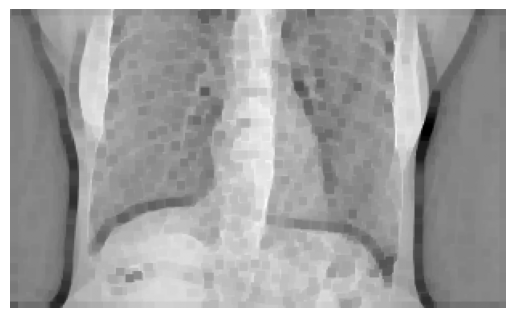

In [14]:
erosion = cv2.erode(image, kernel)
plt.imshow(erosion, cmap = 'gray')
plt.axis('off')
plt.show()

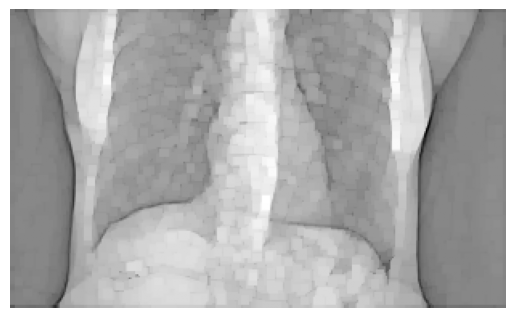

In [15]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap = 'gray')
plt.axis('off')
plt.show()

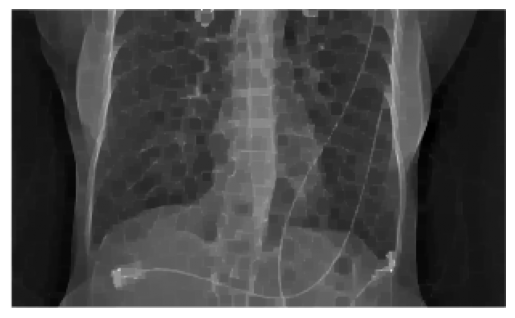

In [16]:
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap = 'gray')
plt.axis('off')
plt.show()

**closing** выделяет и не размазывает (в отличие от *dilation*) кости, что делает его лучшим вариантом для улучшения данного изображения среди *морфологических операций*